In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv(r'C:/Users/paul/Documents/Formation Data Analyst/Bootcamp/Module 2/Project_Week_4/diamonds_clean.csv')
diamonds.drop(diamonds.columns[0], axis=1, inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_score,color_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,2.43,2.43,1,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,2.31,2.31,2,5
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,2.31,2.31,4,5
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,2.63,2.63,3,1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,2.75,2.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,3.50,3.50,2,6
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,3.61,3.61,2,6
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,3.56,3.56,2,6
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,3.74,3.74,1,2


In [3]:
## LINEAR

In [4]:
clarity= pd.pivot_table(diamonds,values='price',index='clarity_score')
clarity

,price
clarity_score,
0,3924.168691
1,5063.028606
2,3996.001148
3,3924.989395
4,3839.455391
5,3283.737071
6,2523.114637
7,2864.839106


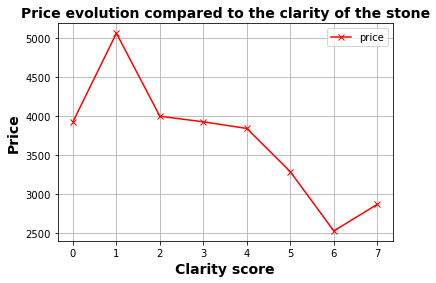

In [5]:
clarity.plot(color='red', marker='x')
plt.title('Price evolution compared to the clarity of the stone', fontsize=14, fontweight='bold')
plt.xlabel('Clarity score', fontsize=14, fontweight='bold')
plt.ylabel('Price', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

C:\Users\paul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


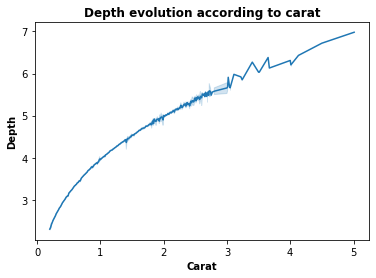

In [6]:
diamonds.sort_values(by=['carat'], inplace=True)
sns.lineplot(diamonds['carat'], diamonds['z'])
plt.title('Depth evolution according to carat', fontweight='bold')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Depth', fontweight='bold')
plt.show()

In [7]:
## BAR

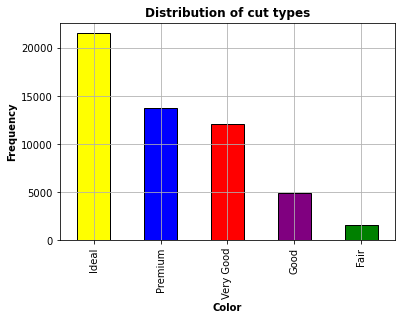

In [8]:
frequency = diamonds['cut'].value_counts()
hist_frequency=frequency.plot.bar(color = ['yellow','blue', 'red', 'purple', 'green'], edgecolor='Black')
plt.xlabel('Color', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title("Distribution of cut types", fontweight='bold')
plt.grid()

C:\Users\paul\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


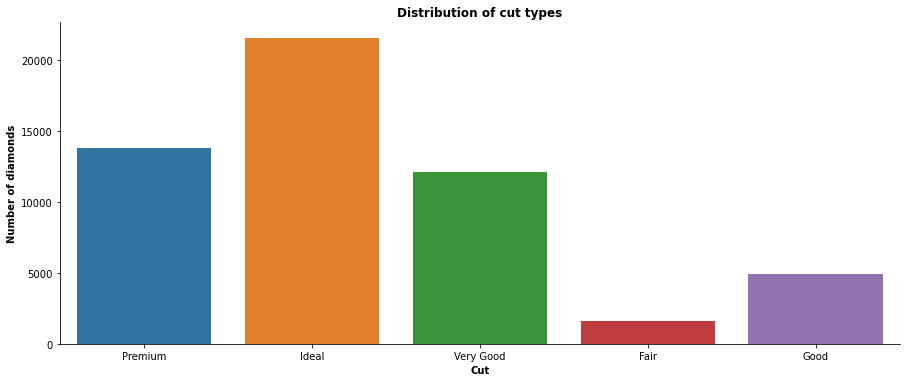

In [9]:
sns.factorplot(x='cut', data=diamonds , kind='count',aspect=2.5 )
plt.title('Distribution of cut types', fontweight='bold')
plt.xlabel('Cut', fontweight='bold')
plt.ylabel('Number of diamonds', fontweight='bold')
plt.show()

In [10]:
## SCATTER

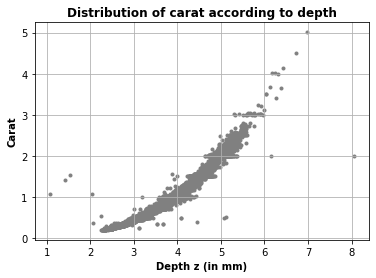

In [11]:
plt.scatter(diamonds['z'], diamonds['carat'], color='grey',marker='.')
plt.title('Distribution of carat according to depth', fontweight='bold')
plt.xlabel('Depth z (in mm)', fontweight='bold')
plt.ylabel('Carat', fontweight='bold')
plt.grid()
plt.show()

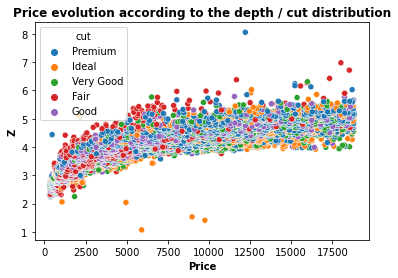

In [12]:
sns.scatterplot(data=diamonds, x='price',y='z', hue='cut')
plt.title('Price evolution according to the depth / cut distribution', fontweight='bold')
plt.xlabel('Price', fontweight='bold')
plt.ylabel('Z', fontweight='bold')
plt.show()

In [13]:
## BOXPLOT

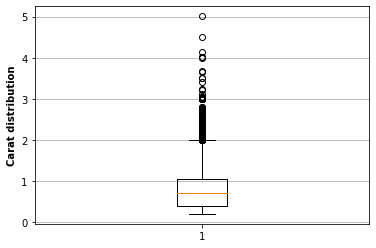

In [14]:
plt.boxplot(diamonds['carat'])
plt.grid(axis='y')
plt.ylabel('Carat distribution', fontweight='bold')

plt.show()

<AxesSubplot:xlabel='cut', ylabel='depth'>

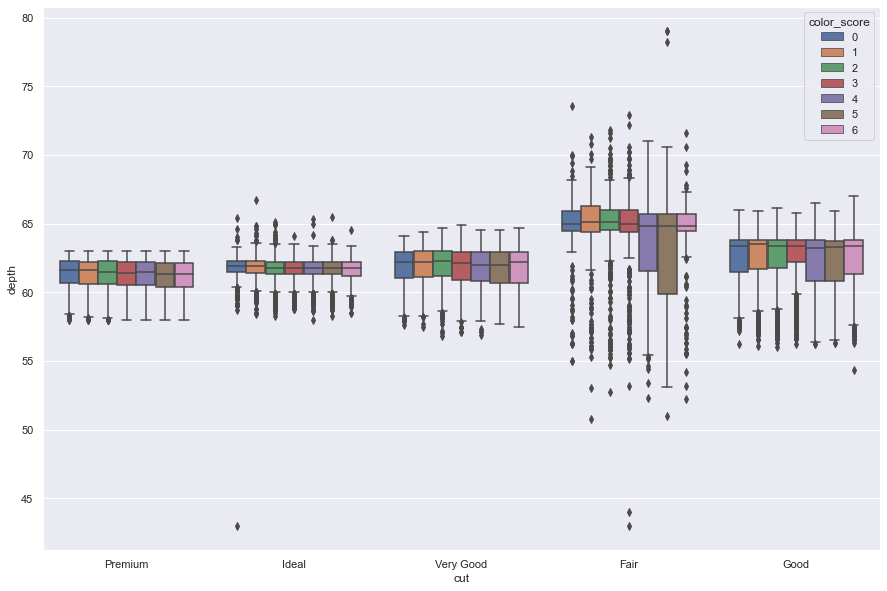

In [15]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x='cut',y='depth',hue='color_score',data=diamonds)

In [16]:
## PIE CHART

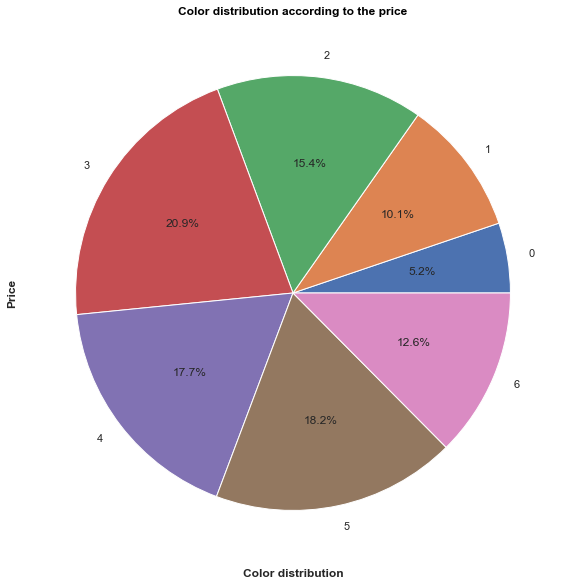

In [17]:
pie = diamonds.groupby(['color_score']).agg('count').reset_index()
plt.title('Color distribution according to the price',color = 'black', fontweight='bold')
plt.pie(pie['price'], labels = pie['color_score'],autopct='%1.1f%%')
plt.xlabel('Color distribution', fontweight='bold')
plt.ylabel('Price', fontweight='bold')
plt.show()

In [18]:
## HEATMAP

<AxesSubplot:>

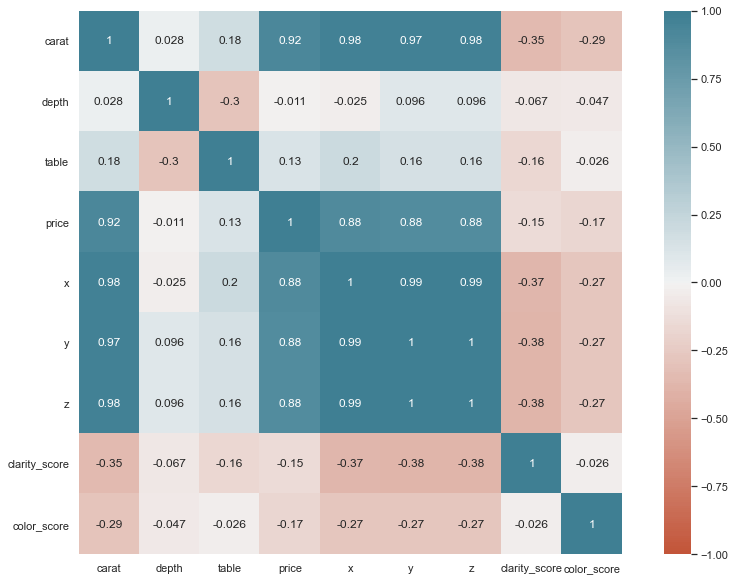

In [19]:
corr=diamonds.corr()
sns.heatmap(corr,vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot = True)

In [20]:
## MULTIPLE SERIES CHART

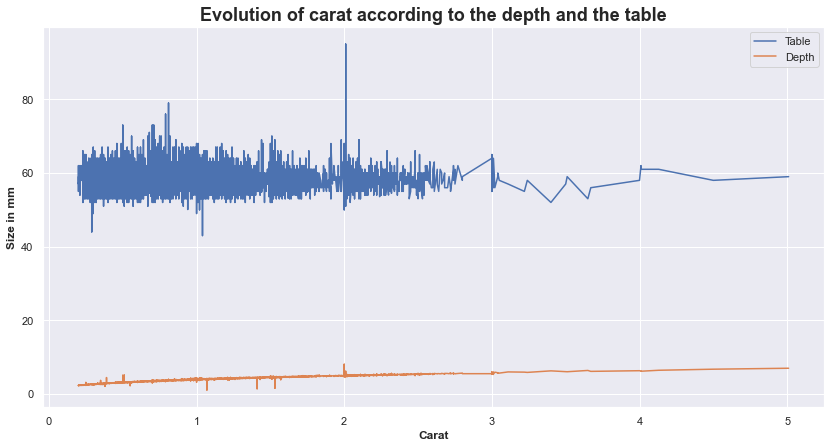

In [21]:
plt.figure(figsize=(14,7))
plt.title('Evolution of carat according to the depth and the table', fontsize=18, fontweight='bold')

plt.plot(diamonds['carat'], diamonds['table'],label ='Table')
plt.plot(diamonds['carat'], diamonds['z'],label='Depth')

plt.legend(loc='best')
plt.xlabel('Carat', fontweight='bold')
plt.ylabel('Size in mm', fontweight='bold')
plt.show()